In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn,optim
from torch.autograd import Variable
##12
##34

D:\Work\Anaconda3\envs\bert\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


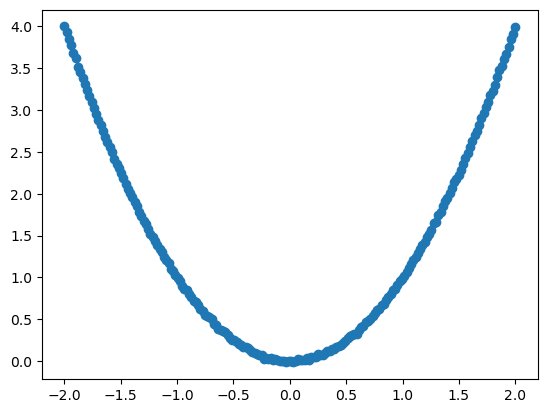

In [39]:
x_data = np.linspace(-2, 2, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.01, x_data.shape)
y_data = np.square(x_data) + noise

plt.scatter(x_data, y_data)
plt.show()

In [40]:
x_data = x_data.reshape(-1, 1) #-1表示自动匹配，这里意思也就是100行，1列
y_data = y_data.reshape(-1 ,1)

In [41]:
#把numpy变成tensor
x_data = torch.FloatTensor(x_data)
x_data.requires_grad = False
y_data = torch.FloatTensor(y_data)
y_data.requires_grad = False

In [42]:
#构建神经网络模型
#一般把网络中具有可学习参数的层放在它的初始化的函数中
class MyModel(nn.Module):
    def __init__(self):
        #继承父类
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(10, 1)
        #定义网络的计算
    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        out = self.fc2(x)
        return out

In [43]:
#实例化模型
model = MyModel()
#定义损失函数
mse_loss = nn.MSELoss()
#定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [44]:
for name, parameters in model.named_parameters():
    print('name:{},param:{}'.format(name, parameters))

name:fc1.weight,param:Parameter containing:
tensor([[ 0.1434],
        [ 0.0124],
        [ 0.4710],
        [-0.6139],
        [-0.7658],
        [ 0.9974],
        [-0.4309],
        [ 0.1738],
        [ 0.8467],
        [-0.5092]], requires_grad=True)
name:fc1.bias,param:Parameter containing:
tensor([-0.2419,  0.1386,  0.3097, -0.7970, -0.9193, -0.2691,  0.5736, -0.0328,
         0.3914, -0.5029], requires_grad=True)
name:fc2.weight,param:Parameter containing:
tensor([[-0.2126,  0.1315,  0.1489,  0.1343,  0.2610, -0.0469,  0.3073, -0.1988,
          0.1409,  0.2527]], requires_grad=True)
name:fc2.bias,param:Parameter containing:
tensor([-0.1318], requires_grad=True)


In [45]:
for i in range(10001):
    out = model(x_data)
    #计算loss
    loss = mse_loss(out, y_data)
    #梯度清0
    optimizer.zero_grad()
    #计算梯度
    loss.backward()
    #修改权值
    optimizer.step()
    if i % 500 == 0:
        print(i, loss.item())

0 3.725289821624756
500 0.29091349244117737
1000 0.06598372757434845
1500 0.030621996149420738
2000 0.01784360222518444
2500 0.011760187335312366
3000 0.008473771624267101
3500 0.006561694201081991
4000 0.0053879618644714355
4500 0.004633852280676365
5000 0.004127866122871637
5500 0.003773125819861889
6000 0.0035129201132804155
6500 0.003313219640403986
7000 0.003153156954795122
7500 0.003019778523594141
8000 0.0029048575088381767
8500 0.0028031975962221622
9000 0.002711440436542034
9500 0.0026273876428604126
10000 0.002549536293372512


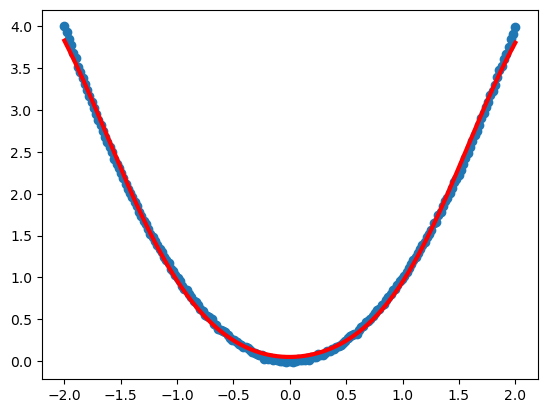

In [46]:
y_pred = model(x_data)
# loss = mse_loss(y_pred, y_data)
# print(loss.item())
plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred.data, 'r-', lw = 3)
plt.show()

In [14]:
print(model)

MyModel(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (tanh): Tanh()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)
